In [1]:
import scipy.io
import csv
import numpy as np
import random
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Load .mat file
mat = scipy.io.loadmat('ovarian_dataset.mat')

# Specify the variable name to convert to CSV
variable_name1 = 'ovarianInputs'
variable_name2 = 'ovarianTargets'
# Get the data from the loaded .mat file
#print(mat)
data1 = mat[variable_name1]
data2 = mat[variable_name2]

# Specify the CSV file name
csv_file_1 = 'data_1.csv'
csv_file_2 = 'data_2.csv'

# Write the data to CSV
with open(csv_file_1, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data1):
        csvwriter.writerow(row)

with open(csv_file_2, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    #for row in data1:
    #    csvwriter.writerow(row)
    for idx, row in enumerate(data2):
        csvwriter.writerow(row)

In [3]:
#Reading Data from .csv file
with open('data_1.csv', 'r') as f:
    reader = csv.reader(f)
    data_features = list(reader)

data_features = np.array(data_features,dtype=np.float32)

with open('data_2.csv', 'r') as f:
    reader = csv.reader(f)
    data_labels = list(reader)

data_labels = np.array(data_labels,dtype=np.float32)
#data_labels = data_labels[0,:]
#data_labels = data_labels.reshape((1,data_labels.shape[0]))
#print(data_array.shape)
#print(data_array)



print(data_features.shape)
# Function to shuffle data and produce training and test data with labels
def train_n_test_data(arr_feat, arr_lab, x1, x2):
    #arr_feat = arr_feat.transpose()
    arr_lab = arr_lab.transpose()
    arr_shape = arr_feat.shape
    print(arr_shape)
    train = int(x1*arr_shape[0])
    val = int(x2*arr_shape[0])
    idx = np.random.randint(low=0, high=arr_shape[0], size=arr_shape[0], dtype=int)

    new_arr = arr_feat[idx]
    new_lbs = arr_lab[idx]
    train_arr = new_arr[0:train]
    val_arr = new_arr[train:train+val]
    test_arr = new_arr[train+val:]
    train_lb = new_lbs[0:train]
    val_lb = new_lbs[train:train+val]
    test_lb = new_lbs[train+val:]
    return train_arr, train_lb, val_arr, val_lb, test_arr, test_lb

#train_arr, train_lb, val_arr, val_lb, test_arr, test_lb = train_n_test_data(data_features, data_labels,0.8,0.1)
#print("Training data size: ",train_arr.shape)
#print("Training label size: ",train_lb.shape)
#print("Validation data size: ",val_arr.shape)
#print("Validation label size: ",val_lb.shape)
#print("Testing data size: ",test_arr.shape)
#print("Testing label size: ",test_lb.shape)


(100, 216)


In [4]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
    def __init__(self):
        super().__init__()

        # Building an linear encoder with Linear
        # layer followed by Relu activation function
        # 784 ==> 9
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(100, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 8),
        )

        # Building an linear decoder with Linear
        # layer followed by Relu activation function
        # The Sigmoid activation function
        # outputs the value between 0 and 1
        # 9 ==> 784
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(8, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 100),
            #torch.nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

In [5]:

# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
                             lr = 0.005,
                             weight_decay = 1e-8)

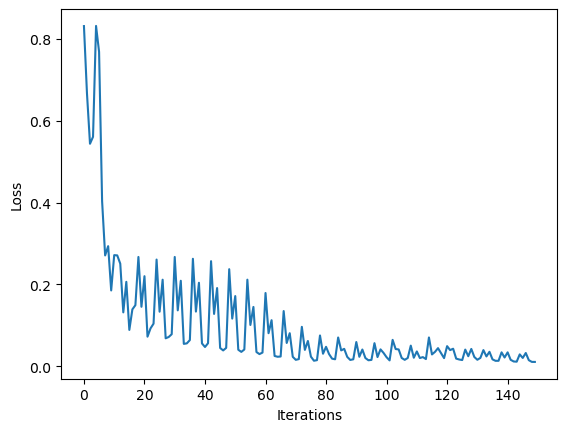

In [6]:
epochs = 25
batch_size = 36
outputs = []
losses = []
for epoch in range(epochs):
    for i in range(data_features.shape[1]//batch_size):

      batch = data_features[:,i*batch_size:(i+1)*batch_size]
      # Reshaping the image to (-1, 784)
      #image = image.reshape(-1, 28*28)

      # Output of Autoencoder
      batch = batch.transpose()
      batch = torch.Tensor(batch)
      encoded,reconstructed = model(batch)

      # Calculating the loss function
      #print(reconstructed)
      loss = loss_function(reconstructed, batch)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(loss.detach())
    outputs.append((epochs, batch, reconstructed))

# Defining the Plot Style
#plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
plt.plot(losses)

In [7]:
features = torch.Tensor(data_features.transpose())
encoded, _ = model(features)
latent = encoded.detach().numpy()
print(latent.shape)

(216, 8)


In [8]:
def load_file(arr_feat, arr_lab, x1, x2):
    #arr_feat = arr_feat.transpose()
    arr_lab = arr_lab.transpose()
    arr_shape = arr_feat.shape
    print(arr_shape)
    train = int(x1*arr_shape[0])
    val = int(x2*arr_shape[0])
    idx = np.random.randint(low=0, high=arr_shape[0], size=arr_shape[0], dtype=int)

    new_arr = arr_feat[idx]
    new_lbs = arr_lab[idx]
    train_arr = new_arr[0:train]
    val_arr = new_arr[train:train+val]
    test_arr = new_arr[train+val:]
    train_lb = new_lbs[0:train]
    val_lb = new_lbs[train:train+val]
    test_lb = new_lbs[train+val:]
    
    print("Training data size: ", train_arr.T.shape)
    print("Training label size: ",train_lb.T.shape)
    print("Testing data size: ", test_arr.T.shape)
    print("Testing label size: ",test_lb.T.shape)
    print("Validation data size: ",val_arr.T.shape)
    print("Validation label size: ",val_lb.T.shape)
    
    return train_arr.T, test_arr.T, train_lb.T, test_lb.T, val_arr.T, val_lb.T 

dataset = load_file(latent,data_labels,0.8,0.1)

(216, 8)
Training data size:  (8, 172)
Training label size:  (2, 172)
Testing data size:  (8, 23)
Testing label size:  (2, 23)
Validation data size:  (8, 21)
Validation label size:  (2, 21)


In [9]:
m = 1
def initialize(n_x,C1,C2):
#     global W,b
    np.random.seed(10)
    W1 = np.random.randn(n_x,C1)*0.1
    b1 = np.zeros((C1,1))
    W2 = np.random.randn(C1,C2)*0.1
    b2 = np.zeros((C2,1))

    return W1, b1, W2, b2

def softmax(z):
    t = np.exp(z)
    a = t / np.sum(t, keepdims=True, axis=0)
    return a

def sigmoid(z):
    return 1/(1+np.exp(-z))

def forward(W, X, b,activation=None):
#     global Z,A
    Z = np.dot(W.T, X) + b # Z.shape is (C,m)
    if activation == 'sigmoid':
        A = sigmoid(Z)
    else:
        A = Z
    return Z, A
def cost(A, Y_hot):
#     global L,J
# Calculate Loss
    L = 0.5*np.sum((A-Y_hot),keepdims=True, axis=0) # L.shape is (C,m)
    J = np.mean(L)
    return L,J

# Genralized backprop function for multiple layers
def backward(X, Y_hot, A, Z, W, b, activation=None,cache=None):
#     global dW,db
    if activation == 'softmax':
        dZ = A - Y_hot
    elif activation == 'sigmoid':
        dZ = np.dot(cache[1],cache[0])*A*(1-A)
    else:
        dZ = A - Y_hot

    dW = np.dot(X, dZ.T)/m
    db = np.mean(dZ, keepdims=True, axis=1)
    return dW, db,dZ

def update(W, b, dW, db, learning_rate):
    W = W - learning_rate*dW
    b = b - learning_rate*db
    return W,b

def SGD(X, Y_hot, W1, b1, W2, b2, learning_rate):
    Z1, A1 = forward(W1, X, b1, 'sigmoid')
    Z2, A2 = forward(W2, A1, b2, 'softmax')
    L, J = cost(A2, Y_hot)
    dW2, db2,dZ2 = backward(A1, Y_hot, A2, Z2, W2, b2)
    dW1, db1,_ = backward(X, Y_hot, A1, Z1, W1, b1, 'sigmoid',cache=(dZ2,W2))
    W1,b1 = update(W1, b1, dW1, db1, learning_rate)
    W2,b2 = update(W2, b2, dW2, db2, learning_rate)
    return W1,b1,W2,b2,J


def predict(W1, b1, W2, b2, X):
    _, A1 = forward(W1, X, b1, 'sigmoid')
    _, A2 = forward(W2, A1, b2, 'softmax')
    return A2

def accuracy(Y_pred, Y):
    return np.mean(Y_pred == Y)

W1, b1, W2, b2 = initialize(8, 128, 2)
learning_rate = 0.001
costs = []
accs = []
#use SGD to train the model and validate at same time
for i in range(100):
    for j in range(dataset[0].shape[1]):
        X = dataset[0][:,j].reshape(-1,1)
        Y = dataset[2][:,j].reshape(-1,1)
        W1,b1,W2,b2,J = SGD(X, Y, W1, b1, W2, b2, learning_rate)
    costs.append(abs(J))
    #validate
    Y_pred = predict(W1, b1, W2, b2, dataset[4])
    acc = accuracy(np.argmax(Y_pred, axis=0), np.argmax(dataset[5], axis=0))
    print(f'Epoch {i+1}: Cost {J}, Val_accuracy {acc}')
    accs.append(acc)

# plt.plot(costs)
# plt.show()
# plt.plot(accs)
# plt.show()

Y_pred = predict(W1, b1, W2, b2, dataset[1])

# confusion matrix
from sklearn.metrics import confusion_matrix
Y_final = np.where(Y_pred >= 0.6, 1, 0)
accuracy(Y_final,dataset[3])
# print("Accuracy: ", accuracy(Y_final,dataset[3])*100,"%")
cfm = confusion_matrix(np.argmax(dataset[3],axis=0), np.argmax(Y_pred, axis=0))
TP = cfm[0][0]
TN = cfm[1][1]
FP = cfm[1][0]
FN = cfm[1][0]
#Specificity
Specificity = TN/(TN+FP)
#Sensitivity
Sensitivity = TP/(TP+FN)
# print(f'Specificity: {Specificity}, Sensitivity: {Sensitivity}')

Epoch 1: Cost -0.0022485621143523704, Val_accuracy 0.6666666666666666
Epoch 2: Cost -0.002358592089153344, Val_accuracy 0.6666666666666666
Epoch 3: Cost -0.002294021008123648, Val_accuracy 0.7619047619047619
Epoch 4: Cost -0.002226344933081603, Val_accuracy 0.7619047619047619
Epoch 5: Cost -0.0021557863039379788, Val_accuracy 0.8095238095238095
Epoch 6: Cost -0.00208235453250899, Val_accuracy 0.8095238095238095
Epoch 7: Cost -0.0020062144140618465, Val_accuracy 0.8571428571428571
Epoch 8: Cost -0.0019276500605492908, Val_accuracy 0.8571428571428571
Epoch 9: Cost -0.0018470325577405466, Val_accuracy 0.8571428571428571
Epoch 10: Cost -0.001764791792629672, Val_accuracy 0.8095238095238095
Epoch 11: Cost -0.0016813921720966185, Val_accuracy 0.8095238095238095
Epoch 12: Cost -0.001597312057718292, Val_accuracy 0.8095238095238095
Epoch 13: Cost -0.0015130267583126633, Val_accuracy 0.8095238095238095
Epoch 14: Cost -0.0014289948908934313, Val_accuracy 0.8095238095238095
Epoch 15: Cost -0.0013

In [10]:
print("Accuracy: ", accuracy(Y_final,dataset[3])*100,"%")
print(f'Specificity: {Specificity}, Sensitivity: {Sensitivity}')

Accuracy:  89.13043478260869 %
Specificity: 0.75, Sensitivity: 0.8823529411764706


Text(0.5, 1.0, 'Validation Accuracy vs Epoch')

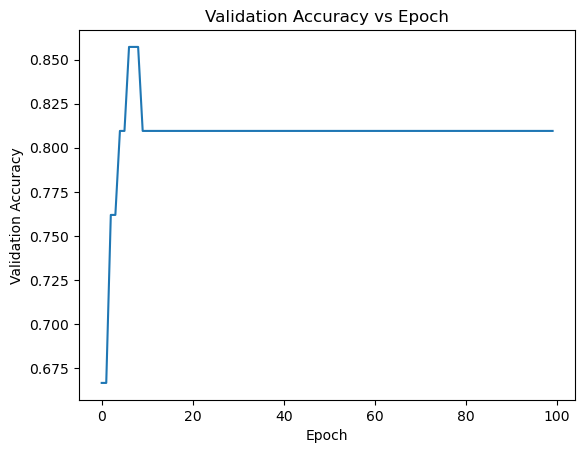

In [11]:
plt.plot(accs)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs Epoch')

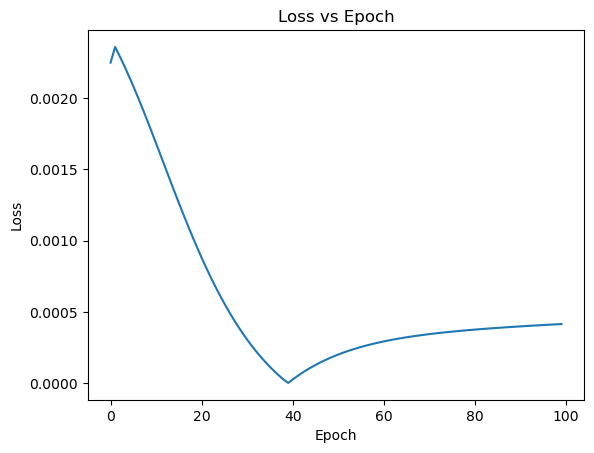

In [12]:
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

Text(0.5, 1.0, 'ROC Curve')

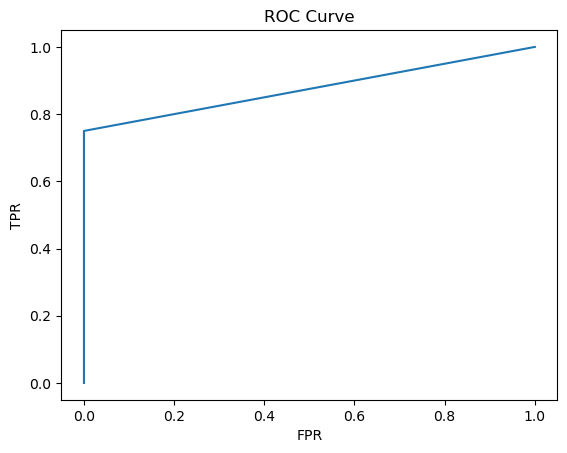

In [13]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(np.argmax(dataset[3],axis=0), np.argmax(Y_pred, axis=0))
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')

In [14]:
#AUC
from sklearn.metrics import auc
print("Accuracy: ", accuracy(Y_final,dataset[3])*100,"%")
print(f'Specificity: {Specificity}, Sensitivity: {Sensitivity}')
print("AUC = ",auc(fpr, tpr))

Accuracy:  89.13043478260869 %
Specificity: 0.75, Sensitivity: 0.8823529411764706
AUC =  0.875
